## ***If you like my work, Kindly upvote it !!*** 


### **Note :-** 

#### ***Below sharing links of my other notebooks along with some sample work done by me, I hope you will like it too.. Incase you have any suggestions or add-less or guidance you want to give me, feel free to write through comment section -***

 ***Feedback Prize - Predicting Effective Arguments :- [Student writing📖 : The Visualization📊](https://www.kaggle.com/code/deepakkaura/student-writing-the-visualization)***

 ***Spaceship Titanic :- [Spaceship Titanic : Story of a Space Titanic 🌌🚢](https://www.kaggle.com/code/deepakkaura/spaceship-titanic-story-of-a-space-titanic)***

 ***H&M Personalized Fashion Recommendations :- [H&M : Insightful Plots and Prediction](https://www.kaggle.com/code/deepakkaura/h-m-insightful-plots-and-prediction)***

 ***Few sample work of mine :- [Deepak Kaura's sample work](https://github.com/deepak7642/Few-Samples-of-My-work/blob/main/README.md)***

# ***Welcome to the Banking sector 🏦***

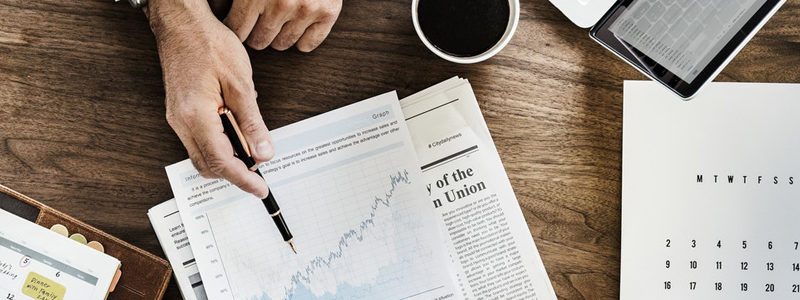

# **Overview :**

***Whether out at a restaurant or buying tickets to a concert, modern life counts on the convenience of a credit card to make daily purchases. It saves us from carrying large amounts of cash and also can advance a full purchase that can be paid over time. How do card issuers know we’ll pay back what we charge? That’s a complex problem with many existing solutions—and even more potential improvements, to be explored in this competition.***

**Credit default prediction is central to managing risk in a consumer lending business. Credit default prediction allows lenders to optimize lending decisions, which leads to a better customer experience and sound business economics. Current models exist to help manage risk. But it's possible to create better models that can outperform those currently in use.**

***American Express is a globally integrated payments company. The largest payment card issuer in the world, they provide customers with access to products, insights, and experiences that enrich lives and build business success.***

**In this competition, you’ll apply your machine learning skills to predict credit default. Specifically, you will leverage an industrial scale data set to build a machine learning model that challenges the current model in production. Training, validation, and testing datasets include time-series behavioral data and anonymized customer profile information. You're free to explore any technique to create the most powerful model, from creating features to using the data in a more organic way within a model.**

***If successful, you'll help create a better customer experience for cardholders by making it easier to be approved for a credit card. Top solutions could challenge the credit default prediction model used by the world's largest payment card issuer—earning you cash prizes, the opportunity to interview with American Express, and potentially a rewarding new career.***

## **Objective of this competition -**


***It's to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.***

### **Data Description : -**


***The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.***

**The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:**

* D_* = Delinquency variables
* S_* = Spend variables
* P_* = Payment variables
* B_* = Balance variables
* R_* = Risk variables


***with the following features being categorical:***

**['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']**

***Your task is to predict, for each customer_ID, the probability of a future payment default (target = 1).***

**Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric.**


**Files**

* **train_data.csv - training data with multiple statement dates per customer_ID**

* **train_labels.csv - target label for each customer_ID**

* **test_data.csv - corresponding test data; your objective is to predict the target label for each customer_ID**

* **sample_submission.csv - a sample submission file in the correct format**

# **Import Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import warnings, gc

## ***Read the file***

In [ ]:
train_df = pd.read_feather('../input/amexfeather/train_data.ftr')


train_df.head()

## **Statistics description**

In [ ]:
train_df.describe().T.drop('std',axis=1).style.background_gradient(subset=['min','50%', 'max'], cmap='winter')

In [ ]:
test_df = pd.read_feather('../input/amexfeather/test_data.ftr')


test_df.head()

## ***Exploratory Data Analysis***

In [ ]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))



train_df = train_df.groupby('customer_ID').tail(1).set_index('customer_ID')
print("The training data begins on {} and ends on {}.".format(train_df['S_2'].min().strftime('%m-%d-%Y'),train_df['S_2'].max().strftime('%m-%d-%Y')))
print("There are {:,.0f} customers in the training set and {} features.".format(train_df.shape[0],train_df.shape[1]))


test_df = test_df.groupby('customer_ID').tail(1).set_index('customer_ID')
print("\nThe test data begins on {} and ends on {}.".format(test_df['S_2'].min().strftime('%m-%d-%Y'),test_df['S_2'].max().strftime('%m-%d-%Y')))
print("There are {:,.0f} customers in the test set and {} features.".format(test_df.shape[0],test_df.shape[1]))

del test_df['S_2']
gc.collect()


titles=['Delinquency '+str(i).split('_')[1] if i.startswith('D') else 'Spend '+str(i).split('_')[1] 
        if i.startswith('S') else 'Payment '+str(i).split('_')[1]  if i.startswith('P') 
        else 'Balance '+str(i).split('_')[1] if i.startswith('B') else 
        'Risk '+str(i).split('_')[1] for i in train_df.columns[:-1]]
cat_cols=['Balance 30', 'Balance 38', 'Delinquency 63', 'Delinquency 64', 'Delinquency 66', 'Delinquency 68',
          'Delinquency 114', 'Delinquency 116', 'Delinquency 117', 'Delinquency 120', 'Delinquency 126', 'Target']
test_df.columns=titles[1:]
titles.append('Target')
train_df.columns=titles

In [ ]:
target=train_df.Target.value_counts(normalize=True)
target.rename(index={1:'Default',0:'Paid'},inplace=True)
pal, color=['#a6edd3'], ['#a6edd3']
fig=go.Figure()
fig.add_trace(go.Pie(labels=target.index, values=target*100, hole=.45, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Accounts: %{value:.2f}%<extra></extra>"))
fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

**From above we saw that about 25% of customers in the training data have defaulted. This proportion is consistent across each day in the training set, with a weekly seasonal trend in the day of the month when customers receive their statements.**

In [ ]:
plot_df=train_df.reset_index().groupby('Spend 2')['customer_ID'].nunique().reset_index()
fig=go.Figure()
fig.add_trace(go.Scatter(x=plot_df['Spend 2'], 
                         y=plot_df['customer_ID'], mode='lines',
                         line=dict(color=pal[0], width=3), 
                         hovertemplate = ''))
fig.update_layout(template=temp, title="Frequency of Customer Statements", 
                  hovermode="x unified", width=800,height=500,
                  xaxis_title='Statement Date', yaxis_title='Number of Statements Issued')
fig.show()
del train_df['Spend 2']

In [ ]:
cols=[col for col in train_df.columns if (col.startswith(('D','T'))) & (col not in cat_cols[:-1])]
plot_df=train_df[cols]

In [ ]:
corr=plot_df.iloc[:,:-1].corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(48,48))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Payment Variables\n', fontsize=16)
fig.show()

***There are several highly correlated Delinquency variables, with a few pairs perfectly positively correlated at 1.0. There are also a number of missing correlations, particularly in Delinquency 87, due to null values in the data. Below are the relationships between some of the most correlated Delinquency variables.***

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(16,5))
fig.suptitle('Relationships between Delinquency Variables,\nLog-Transformed',fontsize=16)
ax[0].hexbin(x='Delinquency 74', y='Delinquency 75', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[0].set(xlabel='Delinquency 74',ylabel='Delinquency 75')
ax[0].text(1, 4, 'Correlation: {:.2f}'.format(plot_df[['Delinquency 74','Delinquency 75']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].hexbin(x='Delinquency 58', y='Delinquency 74', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[1].set(xlabel='Delinquency 58',ylabel='Delinquency 74')
ax[1].text(0.3, 4.2, 'Correlation: {:.2f}'.format(plot_df[['Delinquency 58','Delinquency 74']].corr().iloc[1,0]),
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].hexbin(x='Delinquency 113', y='Delinquency 115', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[2].set(xlabel='Delinquency 73',ylabel='Delinquency 137')
ax[2].text(2.15, 1.95, 'Correlation: {:.2f}'.format(plot_df[['Delinquency 113','Delinquency 115']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[3].hexbin(x='Delinquency 131', y='Delinquency 132', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[3].set(xlabel='Delinquency 131',ylabel='Delinquency 132')
ax[3].text(1.1, 5.9, 'Correlation: {:.2f}'.format(plot_df[['Delinquency 131','Delinquency 132']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
for i in range(4):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [ ]:
cols=[col for col in train_df.columns if (col.startswith(('S','T'))) & (col not in cat_cols[:-1])]
plot_df=train_df[cols]

In [ ]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(16,12))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='winter', annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Spend Variables\n', fontsize=16)
fig.show()

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(16,5))
fig.suptitle('Relationships between Spend Variables,\nLog-Transformed',fontsize=16)
ax[0].hexbin(x='Spend 24', y='Spend 22', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[0].set(xlabel='Spend 24',ylabel='Spend 22')
ax[0].text(-70, 4, 'Correlation: {:.2f}'.format(plot_df[['Spend 24','Spend 22']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].hexbin(x='Spend 7', y='Spend 3', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[1].set(xlabel='Spend 7',ylabel='Spend 3')
ax[1].text(0.4, 4.15, 'Correlation: {:.2f}'.format(plot_df[['Spend 7','Spend 3']].corr().iloc[1,0]),
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].hexbin(x='Spend 15', y='Spend 8', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[2].set(xlabel='Spend 15',ylabel='Spend 8')
ax[2].text(1.2, 1.28, 'Correlation: {:.2f}'.format(plot_df[['Spend 15','Spend 8']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[3].hexbin(x='Spend 11', y='Spend 15', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[3].set(xlabel='Spend 11',ylabel='Spend 15')
ax[3].text(.5,5.5, 'Correlation: {:.2f}'.format(plot_df[['Spend 11','Spend 15']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
for i in range(4):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [ ]:
cols=[col for col in train_df.columns if (col.startswith(('P','T'))) & (col not in cat_cols[:-1])]
plot_df=train_df[cols]

In [ ]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='winter', annot_kws={'fontsize':12,'fontweight':'bold'})
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Payment Variables\n', fontsize=16)
fig.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Relationships between Payment Variables,\nLog-Transformed',fontsize=16)
ax[0].hexbin(x='Payment 2', y='Payment 3', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[0].text(-.2,2.2, 'Correlation: {:.2f}'.format(plot_df[['Payment 2','Payment 3']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[0].set(xlabel='Payment 2',ylabel='Payment 3')
ax[1].hexbin(x='Payment 3', y='Payment 4', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[1].text(-.6,1.35, 'Correlation: {:.2f}'.format(plot_df[['Payment 3','Payment 4']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].set(xlabel='Payment 3',ylabel='Payment 4')
ax[2].hexbin(x='Payment 4', y='Payment 2', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[2].text(.25,1.1, 'Correlation: {:.2f}'.format(plot_df[['Payment 4','Payment 2']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].set(xlabel='Payment 4',ylabel='Payment 2')
for i in range(3):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [ ]:
cols=[col for col in train_df.columns if (col.startswith(('B','T'))) & (col not in cat_cols[:-1])]
plot_df=train_df[cols]

In [ ]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(24,22))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='winter', annot_kws={'fontsize':12,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Balance Variables\n', fontsize=16)
fig.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Relationships between Balance Variables,\nLog-Transformed',fontsize=16)
ax[0].hexbin(x='Balance 23', y='Balance 7', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[0].text(.23,1.42, 'Correlation: {:.2f}'.format(plot_df[['Balance 23','Balance 7']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[0].set(xlabel='Balance 23',ylabel='Balance 7')
ax[1].hexbin(x='Balance 3', y='Balance 11', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[1].text(.3,1.85, 'Correlation: {:.2f}'.format(plot_df[['Balance 3','Balance 11']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].set(xlabel='Balance 3',ylabel='Balance 11')
ax[2].hexbin(x='Balance 11', y='Balance 2', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[2].text(.3,1.07, 'Correlation: {:.2f}'.format(plot_df[['Balance 11','Balance 2']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].set(xlabel='Balance 11',ylabel='Balance 2')
for i in range(3):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [ ]:
cols=[col for col in train_df.columns if (col.startswith(('R','T'))) & (col not in cat_cols[:-1])]
plot_df=train_df[cols]

In [ ]:
corr=plot_df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(24,18))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='winter', annot_kws={'fontsize':12,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Risk Variables\n', fontsize=16)
fig.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Relationships between Risk Variables,\nLog-Transformed',fontsize=16)
ax[0].hexbin(x='Risk 8', y='Risk 5', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[0].text(5,35.7, 'Correlation: {:.2f}'.format(plot_df[['Risk 8','Risk 5']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[0].set(xlabel='Risk 8',ylabel='Risk 5')
ax[1].hexbin(x='Risk 3', y='Risk 16', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[1].text(1.3,14.3, 'Correlation: {:.2f}'.format(plot_df[['Risk 3','Risk 16']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[1].set(xlabel='Risk 3',ylabel='Risk 16')
ax[2].hexbin(x='Risk 20', y='Risk 17', data=plot_df, bins='log', gridsize=40, cmap='winter')
ax[2].text(7,1.02, 'Correlation: {:.2f}'.format(plot_df[['Risk 20','Risk 17']].corr().iloc[1,0]), 
           ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
ax[2].set(xlabel='Risk 20',ylabel='Risk 17')
for i in range(3):
    ax[i].tick_params(left=False,bottom=False)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [ ]:
corr=train_df.corr()
corr=corr['Target'].sort_values(ascending=False)[1:-1]
pal=sns.color_palette("Reds_r",135).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig = go.Figure()
fig.add_trace(go.Bar(x=corr[corr>=0], y=corr[corr>=0].index, 
                     marker_color=rgb, orientation='h', 
                     marker_line=dict(color=pal,width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
pal=sns.color_palette("Greens",100).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig.add_trace(go.Bar(x=corr[corr<0], y=corr[corr<0].index, 
                     marker_color=rgb[25:], orientation='h', 
                     marker_line=dict(color=pal[25:],width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
fig.update_layout(template=temp,title="Feature Correlations with Target",
                  xaxis_title="Correlation", margin=dict(l=150),
                  height=3000, width=700, hovermode='closest')
fig.show()

***There are several strong correlations with the target variable. Payment 2 is the most negatively correlated with the probability of defaulting with a correlation of -0.67, while Delinquency 48 is the most positively correlated overall at 0.61. Delinquency 87 is also missing from the correlations above due to the proportion of null values. In fact, 24 of the top 30 features with missing values are in Delinquency variables.***

In [ ]:
null=round((train_df.isna().sum()/train_df.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null=null.to_frame().rename(columns={0:'Missing %'})
null.head(30)

# **Building Model**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_feather('../input/amexfeather/train_data.ftr')

In [ ]:
df_cat = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126','D_63','D_64', 'D_66', 'D_68'] 

df_all = list(df.columns)
df_all.remove("customer_ID")
df_all.remove("S_2")
df_all.remove("D_142")

#finding set of numerical features by cosnducting simple set operations
df_num = list(set(df_all) - set(df_cat))

print(df_num[0:5])

In [ ]:
df = df[df_all]

df.isnull().sum()

In [ ]:
perc = 20.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)
df

***Now, after removing certain features from the dataframe we clean it further by dropping all rows with NA, we have lost some data but still have a lot of data for model building nad testing.***

In [ ]:
df=df.dropna()
df=df.reset_index()
df=df.drop("index",axis=1)

df

In [ ]:
df_all = list(df.columns)

df_num = list(set(df_all) - set(df_cat))

df_cat = list(set(df_all) - set(df_num))

df_num[0:5]

In [ ]:
df_all=list(df.columns)
df_all.remove("target")

In [ ]:
df_encoded = pd.get_dummies( df[df_all], 
                                        columns = df_cat,
                                        drop_first = True )

df_encoded

In [ ]:
X = df_encoded
Y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 42 )

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [ ]:
from sklearn.linear_model import LogisticRegression


logit = LogisticRegression()

logit.fit( train_X, train_y)

In [ ]:
pred_y = logit.predict(test_X)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y,pred_y)
print(cm)
accuracy_score(test_y, pred_y)

In [ ]:
from sklearn import metrics
print( metrics.classification_report( test_y, pred_y ) )